![alt_txt](./logo.png)

# Load raw data from the dataset

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix
import itertools
import os
from pylab import *

In [82]:
X_train = pd.read_csv('train_feature_matrix.csv',header=None) 
y_train = pd.read_csv('train_label.csv',header=None) 
X_test = pd.read_csv('test_feature_matrix.csv',header=None) 
y_test = pd.read_csv('test_label.csv',header=None) 
 

In [106]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression

def LetsTraining(X_train,y_train,X_test,y_test, estimator, param=None, param_grid=None, scaler=MinMaxScaler(), n_splits=20):
    """
    this function will first conduct train/test split, then normalize on with 'scaler' on trian set
    then cast normalization on test set to avoid data leakage from test set 
    It will fit the traing data from 'estimator' with parameters of 'param'
    Finally, it will print the calculated traning score and test with n_splits
    ----------------------------------------------------------------------
    X: pd DataFrame 
    y: pd DataFrame or Series
    
    estimator: like SVC,LogisticRegression,LinearSVC,etc.
    
    param: parameters to pass into estimator {'C':1 }
    
    scaler:Normalization function, Defualt: MinMaxScaler
    
    n_splits: number of iterations to run and average, Defualt: 20
     ----------------------------------------------------------------------
     Output:
     clf : return the classifier with best test score
     cache:  dictionary including 'trainmean','trainstd','testmean','teststd', 'confusion_matrix','scaler'
    """
    scores=[]
    trainscores=[]

        
    #Feature Normalization
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)

    #traing data using estimator
    clf=estimator()
    if param!=None:
        clf=clf.set_params(**param)

    
        
    clf.fit(X_train,y_train)
    #pass score of test set 
    scores.append(clf.score(X_test,y_test))
    trainscores.append(clf.score(X_train,y_train))
    
    y_train_pred=clf.predict(X_train)
    
    #calculate confusion matrix
    y_pred=clf.predict(X_test)
    rmse_train=math.sqrt(mean_squared_error(y_train, y_train_pred))
    print('Traing RMSE:' + str(rmse_train) )
    
    
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    print('Test RMSE:' + str(rmse) )
    
    xline = np.linspace(0,1000, 10)
    yline = np.linspace(0,1000, 10)
    
    plt.plot(y_train_pred,y_train,'o', color='orange', label = 'Training Results')
    plt.plot(y_pred,y_test, 'o', label = 'Testing Results')
    plt.plot(xline, yline, ':', color = 'k')
    plt.xlabel('Experimental Value')
    plt.ylabel('Predicted Value')
    plt.xlim(0,1000)
    plt.ylim(0,1000)
    plt.legend()
    plt.show()
    
    
    
    #print("The training model is {} with parmameter {}\n".format(str(estimator()),str(param)))
    #print("The training score is: {:.2f} +- {:.2f}".format(np.mean(trainscores),np.std(trainscores)))
    #print("The test score is: {:.2f} +- {:.2f}\n".format(np.mean(scores),np.std(scores)))
    #cache={'trainmean':np.mean(trainscores),'trainstd':np.std(trainscores),'testmean':np.mean(scores),'teststd':np.std(scores),'confusion_matrix':cnf_matrixes,'scaler':scaler}
    return clf,rmse
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}#X_cor_select
#LetsTraining(X,y,LinearRegression,param={'C': 10,'penalty':'l1'})   

Traing RMSE:43.217423500015585
Test RMSE:2517.776166251692


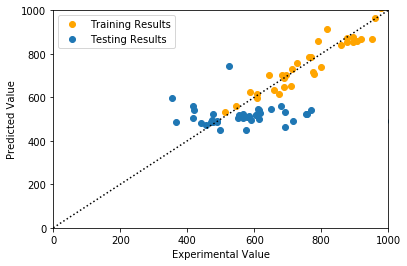

In [98]:
clf=LetsTraining(X_train,y_train,X_test,y_test,LinearRegression)

In [99]:
from sklearn.linear_model import ElasticNet

Traing RMSE:138.34165302340347
Test RMSE:258.593240731447


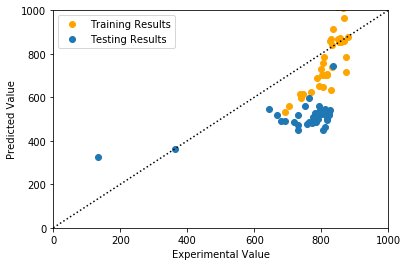

In [100]:
clf=LetsTraining(X_train,y_train,X_test,y_test,ElasticNet)

Traing RMSE:70.88448239859902
Test RMSE:255.18484917982707


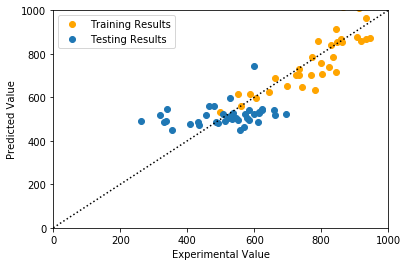

In [102]:
from sklearn.linear_model import Lasso
clf=LetsTraining(X_train,y_train,X_test,y_test,Lasso)

Traing RMSE:76.80230185469779
Test RMSE:336.409135018943


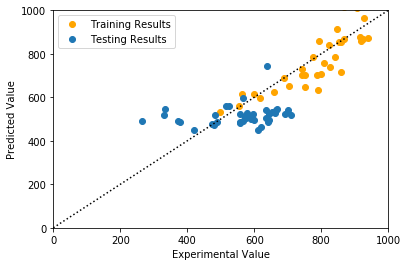

In [105]:
from sklearn.linear_model import Ridge
clf=LetsTraining(X_train,y_train,X_test,y_test,Ridge)

Traing RMSE:143.3010558856636
Test RMSE:271.69965334654296


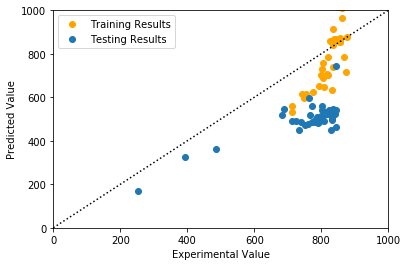

Traing RMSE:138.74743780990687
Test RMSE:258.61175089850997


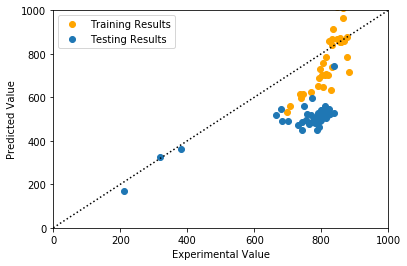

Traing RMSE:138.34165302340347
Test RMSE:258.593240731447


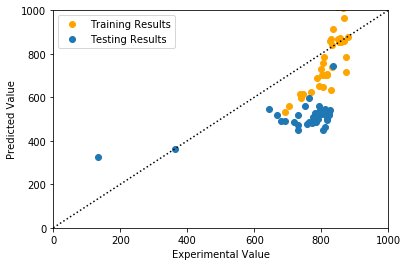

Traing RMSE:139.03715153496069
Test RMSE:257.7632936913492


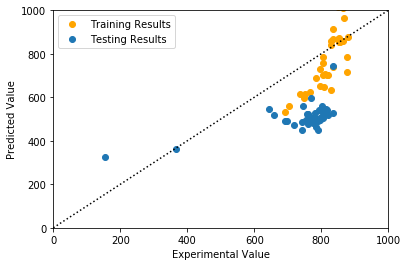

Traing RMSE:135.7953509521255
Test RMSE:254.1437278216964


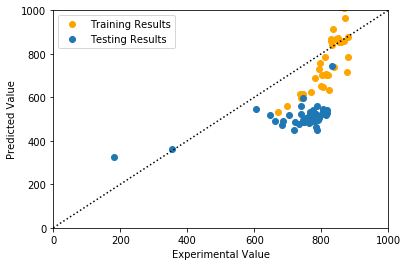

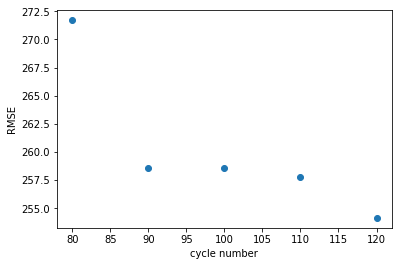

In [121]:
RMS=[]
lists=[80,90,100,110,120]
for ls in lists:
    X_train = pd.read_csv('../cycle'+str(ls)+'/train_feature_matrix.csv',header=None) 
    y_train = pd.read_csv('../cycle'+str(ls)+'/train_label.csv',header=None) 
    X_test = pd.read_csv('../cycle'+str(ls)+'/test_feature_matrix.csv',header=None) 
    y_test = pd.read_csv('../cycle'+str(ls)+'/test_label.csv',header=None) 
    _,rmse = LetsTraining(X_train,y_train,X_test,y_test,ElasticNet)
    RMS.append(rmse)
plt.plot(lists,RMS,'o')
plt.xlabel('cycle number')
plt.ylabel('RMSE')
plt.show()
